<a href="https://colab.research.google.com/github/aspyridakos/Speechbrain-MOABB-EEG-Processing/blob/main/Project_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EEG-Based Motor Imagery Decoding with Deep Learning**

## **Abstract**
   Abstract here. Give an executive summary of your project: goal, methods, results, conclusions. Usually no more than 200 words.


## **Introduction**

Here you have to explain the problem that you are solving. Explain why it is important, and what are the main challenges. Mention previous attempts (add papers as references) to solve it. Mainly focus on the techniques closely related to our approach. Briefly describe your approach and explain why it is promising for solving the addressed problem. Mention the dataset and the main results achieved.

In this section, you can add **text** and **figures**.

## **Methodology**
Describe the important steps you took to achieve your goal. Focus more on the most important steps (preprocessing, extra features, model aspects) that turned out to be important. Mention the original aspects of the project and state how they relate to existing work.

In this section, you can add **text** and **figures**. For instance, it is strongly suggested to add a picture of the best machine learning model that you implemented to solve your problem (and describe it).


## **Experimental Setup**
Describe the datasets used for your experiments. List the machine learning techniques used to solve your problem and report the corresponding hyperparameters.

In this section, you can add **text**, **tables**, and **figures**.

Mount to Google Drive to save results

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Create working directory in drive

In [ ]:
!mkdir '/content/drive/MyDrive/EEG_Project'

mkdir: cannot create directory ‘/content/drive/MyDrive/EEG_Project’: File exists


## Replication of existing experiments

In [1]:
%%capture stdout_stderr
%cd /content/drive/MyDrive/EEG_Project/

!pip install braindecode
!pip install tensorflow
!pip install torch
!pip install torch2trt
!pip install numpy[numpy]
!pip install orion[profet]

Initializing SpeechBrain-MOABB

In [5]:
%%capture
%cd /content/drive/MyDrive/EEG_Project/
!git clone https://github.com/speechbrain/benchmarks
%cd /content/drive/MyDrive/EEG_Project/benchmarks
!git checkout eeg

%cd /content/drive/MyDrive/EEG_Project/benchmarks/benchmarks/MOABB
!pip install -r extra-requirements.txt # Install additional dependencies

In [6]:
%%capture
%cd /content/drive/MyDrive/EEG_Project/
!git clone https://github.com/speechbrain/speechbrain/
%cd /content/drive/MyDrive/EEG_Project/speechbrain/

# Install required dependencies
!pip install -r requirements.txt

# Install in edit mode
!pip install -e .

%cd /content/drive/MyDrive/EEG_Project/

Replicate training data for one subject

In [ ]:
%cd /content/drive/MyDrive/EEG_Project/benchmarks/benchmarks/MOABB/

!python train.py hparams/MotorImagery/BNCI2014001/EEGNet.yaml \
--data_folder=eeg_data \
--cached_data_folder=eeg_pickled_data \
--output_folder=results/MotorImagery/BNCI2014001/ \
--target_subject_idx=0 \
--target_session_idx=1 \
--data_iterator_name=leave-one-session-out

Streaming output truncated to the last 5000 lines.
speechbrain.utils.epoch_loop - Going into epoch 35
speechbrain.nnet.schedulers - Changing lr from 7.1e-05 to 6.9e-05
speechbrain.utils.train_logger - epoch: 35, lr: 7.22e-05 - train loss: 3.34e-01 - valid loss: 1.33, valid f1: 3.31e-01, valid acc: 3.75e-01, valid cm: [[8 6 0 0]
 [5 9 0 0]
 [6 5 3 0]
 [7 4 2 1]]
speechbrain.utils.epoch_loop - Going into epoch 36
speechbrain.nnet.schedulers - Changing lr from 5e-05 to 4.9e-05
speechbrain.utils.train_logger - epoch: 36, lr: 5.14e-05 - train loss: 3.04e-01 - valid loss: 1.32, valid f1: 3.65e-01, valid acc: 4.11e-01, valid cm: [[ 8  6  0  0]
 [ 4 10  0  0]
 [ 5  5  4  0]
 [ 7  3  3  1]]
speechbrain.utils.epoch_loop - Going into epoch 37
speechbrain.nnet.schedulers - Changing lr from 2.9e-05 to 2.8e-05
speechbrain.utils.train_logger - epoch: 37, lr: 3.06e-05 - train loss: 2.99e-01 - valid loss: 1.30, valid f1: 3.65e-01, valid acc: 4.11e-01, valid cm: [[ 8  6  0  0]
 [ 4 10  0  0]
 [ 5  5  4 

Replicate training data for all subjects

In [ ]:
%cd /content/drive/MyDrive/EEG_Project/benchmarks/benchmarks/MOABB/
!chmod +x /content/drive/MyDrive/EEG_Project/benchmarks/benchmarks/MOABB/run_experiments.sh

!./run_experiments.sh \
--hparams hparams/MotorImagery/BNCI2014001/EEGNet.yaml \
--data_folder eeg_data \
--output_folder results/MotorImagery/BNCI2014001/EEGNet \
--nsbj 9 \
--nsess 2 \
--nruns 10 \
--train_mode leave-one-session-out \
--device=cuda

Streaming output truncated to the last 5000 lines.
speechbrain.nnet.schedulers - Changing lr from 8.3e-06 to 7e-06
speechbrain.utils.train_logger - epoch: 38, lr: 9.73e-06 - train loss: 1.75e-01 - valid loss: 9.84e-01, valid f1: 5.62e-01, valid acc: 5.71e-01, valid cm: [[14  0  0  0]
 [ 6  7  1  0]
 [ 8  1  4  1]
 [ 6  1  0  7]]
speechbrain.utils.epoch_loop - Going into epoch 39
speechbrain.nnet.schedulers - Changing lr from 1.3e-05 to 1.4e-05
speechbrain.utils.train_logger - epoch: 39, lr: 1.11e-05 - train loss: 1.67e-01 - valid loss: 9.35e-01, valid f1: 5.80e-01, valid acc: 5.89e-01, valid cm: [[14  0  0  0]
 [ 5  8  1  0]
 [ 8  1  4  1]
 [ 6  1  0  7]]
speechbrain.utils.epoch_loop - Going into epoch 40
speechbrain.nnet.schedulers - Changing lr from 3.3e-05 to 3.5e-05
speechbrain.utils.train_logger - epoch: 40, lr: 3.20e-05 - train loss: 1.57e-01 - valid loss: 8.84e-01, valid f1: 5.97e-01, valid acc: 6.07e-01, valid cm: [[14  0  0  0]
 [ 4  9  1  0]
 [ 8  1  4  1]
 [ 6  1  0  7]]
spe

#### Results
---- leave-one-session-out ----
0train acc 0.7392 ± 0.1021
1test acc 0.7257 ± 0.104

Aggregated results
acc 0.732445987654321 +- 0.0067515432098765316
Final Results (Performance Aggregation)


---- leave-one-session-out ----

0train acc [0.747700 0.731100 0.737300 0.735000 0.728400 0.731900 0.731900 0.737700 0.723000 0.739200] avg: 0.734320 ± 0.006394
1test acc [0.726500 0.720700 0.704100 0.726500 0.716800 0.732300 0.720300 0.719900 0.730300 0.725700] avg: 0.722310 ± 0.007646


Aggregated results

acc [0.737076 0.725887 0.720679 0.730710 0.722608 0.732060 0.726080 0.728781 0.726659 0.732446] avg: 0.728299 ± 0.004672
[{'name': 'objective', 'type': 'objective', 'value': 0.27170138888888884}]
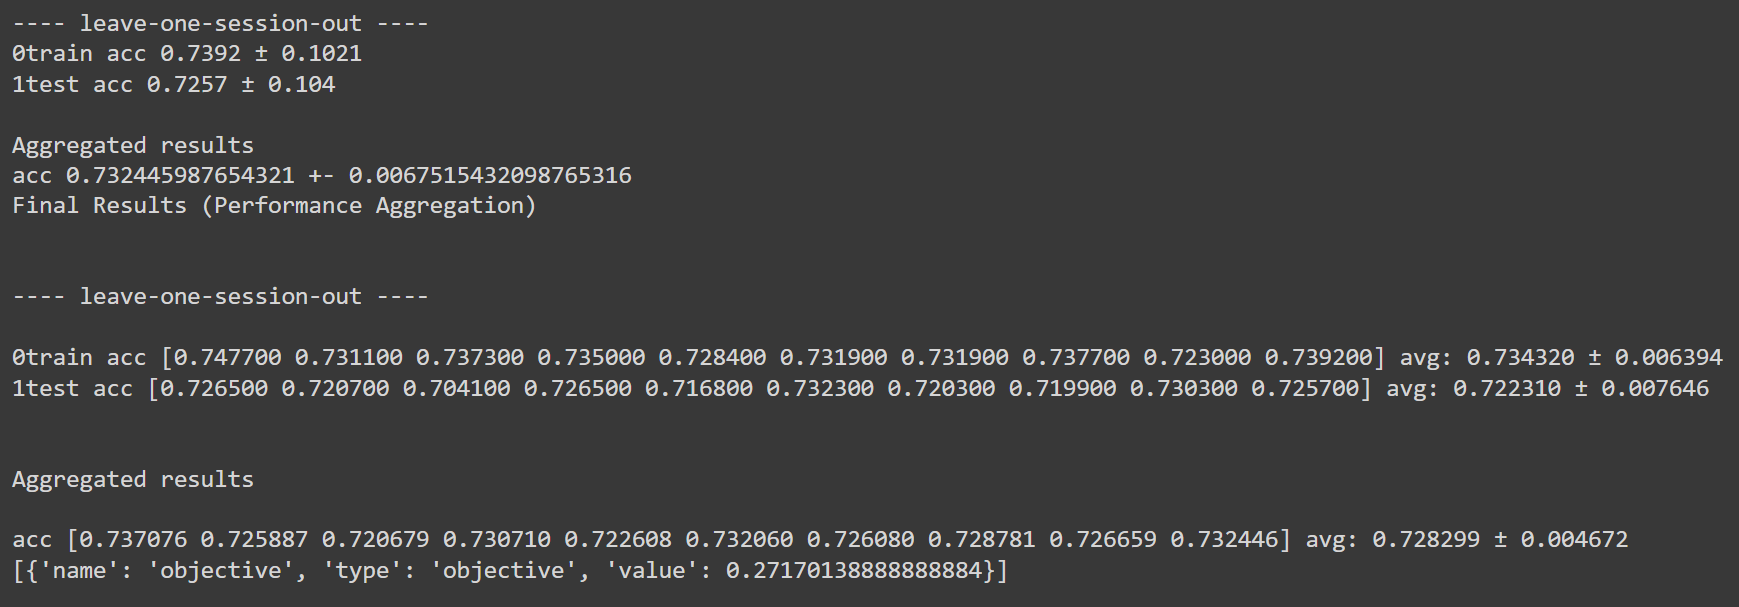

## Custom Model 1

#### Define new custom model

In [3]:
%%writefile /content/drive/MyDrive/EEG_Project/benchmarks/benchmarks/MOABB/models/CustomModel1.py
import torch
import speechbrain as sb


class CustomModel1(torch.nn.Module):
    """CustomModel1.

    Arguments
    ---------
    input_shape: tuple
        The shape of the input.
    cnn_temporal_kernels: int
        Number of kernels in the 2d temporal convolution.
    cnn_temporal_kernelsize: tuple
        Kernel size of the 2d temporal convolution.
    cnn_spatial_depth_multiplier: int
        Depth multiplier of the 2d spatial depthwise convolution.
    cnn_spatial_max_norm: float
        Kernel max norm of the 2d spatial depthwise convolution.
    cnn_spatial_pool: tuple
        Pool size and stride after the 2d spatial depthwise convolution.
    cnn_septemporal_depth_multiplier: int
        Depth multiplier of the 2d temporal separable convolution.
    cnn_septemporal_kernelsize: tuple
        Kernel size of the 2d temporal separable convolution.
    cnn_septemporal_pool: tuple
        Pool size and stride after the 2d temporal separable convolution.
    cnn_pool_type: string
        Pooling type.
    dropout: float
        Dropout probability.
    dense_max_norm: float
        Weight max norm of the fully-connected layer.
    dense_n_neurons: int
        Number of output neurons.
    activation_type: str
        Activation function of the hidden layers.

    Example
    -------
    #>>> inp_tensor = torch.rand([1, 200, 32, 1])
    #>>> model = EEGNet(input_shape=inp_tensor.shape)
    #>>> output = model(inp_tensor)
    #>>> output.shape
    #torch.Size([1,4])
    """

    def __init__(
        self,
        input_shape=None,  # (1, T, C, 1)
        cnn_temporal_kernels=8,
        cnn_temporal_kernelsize=(33, 1),
        cnn_spatial_depth_multiplier=2,
        cnn_spatial_max_norm=1.0,
        cnn_spatial_pool=(4, 1),
        cnn_septemporal_depth_multiplier=1,
        cnn_septemporal_point_kernels=None,
        cnn_septemporal_kernelsize=(17, 1),
        cnn_septemporal_pool=(8, 1),
        cnn_pool_type="avg",
        dropout=0.5,
        dense_max_norm=0.25,
        dense_n_neurons=4,
        activation_type="elu",
    ):
        super().__init__()
        if input_shape is None:
            raise ValueError("Must specify input_shape")
        if activation_type == "gelu":
            activation = torch.nn.GELU()
        elif activation_type == "elu":
            activation = torch.nn.ELU()
        elif activation_type == "relu":
            activation = torch.nn.ReLU()
        elif activation_type == "leaky_relu":
            activation = torch.nn.LeakyReLU()
        elif activation_type == "prelu":
            activation = torch.nn.PReLU()
        else:
            raise ValueError("Wrong hidden activation function")
        self.default_sf = 128  # sampling rate of the original publication (Hz)
        # T = input_shape[1]
        C = input_shape[2]

        # CONVOLUTIONAL MODULE
        self.conv_module = torch.nn.Sequential()
        # Temporal convolution
        self.conv_module.add_module(
            "conv_0",
            sb.nnet.CNN.Conv2d(
                in_channels=1,
                out_channels=cnn_temporal_kernels,
                kernel_size=cnn_temporal_kernelsize,
                padding="same",
                padding_mode="constant",
                bias=False,
                swap=True,
            ),
        )
        self.conv_module.add_module(
            "bnorm_0",
            sb.nnet.normalization.BatchNorm2d(
                input_size=cnn_temporal_kernels, momentum=0.01, affine=True,
            ),
        )
        # Spatial depthwise convolution
        cnn_spatial_kernels = (
            cnn_spatial_depth_multiplier * cnn_temporal_kernels
        )
        self.conv_module.add_module(
            "conv_1",
            sb.nnet.CNN.Conv2d(
                in_channels=cnn_temporal_kernels,
                out_channels=cnn_spatial_kernels,
                kernel_size=(1, C),
                groups=cnn_temporal_kernels,
                padding="valid",
                bias=False,
                max_norm=cnn_spatial_max_norm,
                swap=True,
            ),
        )
        self.conv_module.add_module(
            "bnorm_1",
            sb.nnet.normalization.BatchNorm2d(
                input_size=cnn_spatial_kernels, momentum=0.01, affine=True,
            ),
        )
        self.conv_module.add_module("act_1", activation)
        self.conv_module.add_module(
            "pool_1",
            sb.nnet.pooling.Pooling2d(
                pool_type=cnn_pool_type,
                kernel_size=cnn_spatial_pool,
                stride=cnn_spatial_pool,
                pool_axis=[1, 2],
            ),
        )
        self.conv_module.add_module("dropout_1", torch.nn.Dropout(p=dropout))

        # Temporal separable convolution
        cnn_septemporal_kernels = (
            cnn_spatial_kernels * cnn_septemporal_depth_multiplier
        )
        self.conv_module.add_module(
            "conv_2",
            sb.nnet.CNN.Conv2d(
                in_channels=cnn_spatial_kernels,
                out_channels=cnn_septemporal_kernels,
                kernel_size=cnn_septemporal_kernelsize,
                groups=cnn_spatial_kernels,
                padding="same",
                padding_mode="constant",
                bias=False,
                swap=True,
            ),
        )

        if cnn_septemporal_point_kernels is None:
            cnn_septemporal_point_kernels = cnn_septemporal_kernels

        self.conv_module.add_module(
            "conv_3",
            sb.nnet.CNN.Conv2d(
                in_channels=cnn_septemporal_kernels,
                out_channels=cnn_septemporal_point_kernels,
                kernel_size=(1, 1),
                padding="valid",
                bias=False,
                swap=True,
            ),
        )
        self.conv_module.add_module(
            "bnorm_3",
            sb.nnet.normalization.BatchNorm2d(
                input_size=cnn_septemporal_point_kernels,
                momentum=0.01,
                affine=True,
            ),
        )
        self.conv_module.add_module("act_3", activation)
        self.conv_module.add_module(
            "pool_3",
            sb.nnet.pooling.Pooling2d(
                pool_type=cnn_pool_type,
                kernel_size=cnn_septemporal_pool,
                stride=cnn_septemporal_pool,
                pool_axis=[1, 2],
            ),
        )
        self.conv_module.add_module("dropout_3", torch.nn.Dropout(p=dropout))

        # New spatial convolutional layer
        self.conv_module.add_module(
            "conv_new",
            sb.nnet.CNN.Conv2d(
                in_channels=cnn_septemporal_point_kernels,
                out_channels=cnn_spatial_kernels,  # Specify the desired number of output channels
                kernel_size=(2, 3),  # Specify the desired kernel size
                padding="same",
                padding_mode="constant",
                bias=False,
                swap=True,
            ),
        )
        self.conv_module.add_module(
            "bnorm_new",
            sb.nnet.normalization.BatchNorm2d(
                input_size=cnn_spatial_kernels, momentum=0.01, affine=True,
            ),
        )
        self.conv_module.add_module("act_new", torch.nn.LeakyReLU()) # using LeakyReLU for this convolution module activation
        self.conv_module.add_module(
            "pool_new",
            sb.nnet.pooling.Pooling2d(
                pool_type=cnn_pool_type,
                kernel_size=cnn_spatial_pool,
                stride=cnn_spatial_pool,
                pool_axis=[1, 2],
            ),
        )
        self.conv_module.add_module("dropout_new", torch.nn.Dropout(p=dropout))


        # Shape of intermediate feature maps
        out = self.conv_module(
            torch.ones((1,) + tuple(input_shape[1:-1]) + (1,))
        )
        dense_input_size = self._num_flat_features(out)
        # DENSE MODULE
        self.dense_module = torch.nn.Sequential()
        self.dense_module.add_module(
            "flatten", torch.nn.Flatten(),
        )
        self.dense_module.add_module(
            "fc_out",
            sb.nnet.linear.Linear(
                input_size=dense_input_size,
                n_neurons=dense_n_neurons,
                max_norm=dense_max_norm,
            ),
        )
        self.dense_module.add_module("act_out", torch.nn.LogSoftmax(dim=1))

    def _num_flat_features(self, x):
        """Returns the number of flattened features from a tensor.

        Arguments
        ---------
        x : torch.Tensor
            Input feature map.
        """

        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

    def forward(self, x):
        """Returns the output of the model.

        Arguments
        ---------
        x : torch.Tensor (batch, time, EEG channel, channel)
            Input to convolve. 4d tensors are expected.
        """
        x = self.conv_module(x)
        x = self.dense_module(x)
        return x


Writing /content/drive/MyDrive/EEG_Project/benchmarks/benchmarks/MOABB/models/CustomModel1.py


#### Define `yaml` file containing the tuned hyper-params for the decoding pipeline using dataset BCNI2014_001 from MOABB.

In [7]:
from hyperpyyaml import load_hyperpyyaml, dump_hyperpyyaml

custom_hyperparams = """
seed: 1234
__set_torchseed: !apply:torch.manual_seed [!ref <seed>]

# DIRECTORIES
data_folder: !PLACEHOLDER  #'/path/to/dataset'. The dataset will be automatically downloaded in this folder
cached_data_folder: !PLACEHOLDER #'path/to/pickled/dataset'
output_folder: !PLACEHOLDER #'path/to/results'

# DATASET HPARS
# Defining the MOABB dataset.
dataset: !new:moabb.datasets.BNCI2014001
save_prepared_dataset: True # set to True if you want to save the prepared dataset as a pkl file to load and use afterwards
data_iterator_name: !PLACEHOLDER
target_subject_idx: !PLACEHOLDER
target_session_idx: !PLACEHOLDER
events_to_load: null # all events will be loaded
original_sample_rate: 250 # Original sampling rate provided by dataset authors
sample_rate: 125 # Target sampling rate (Hz)
# band-pass filtering cut-off frequencies
fmin: 0.13 # @orion_step1: --fmin~"uniform(0.1, 5, precision=2)"
fmax: 46.0 # @orion_step1: --fmax~"uniform(20.0, 50.0, precision=3)"
n_classes: 4
# tmin, tmax respect to stimulus onset that define the interval attribute of the dataset class
# trial begins (0 s), cue (2 s, 1.25 s long); each trial is 6 s long
# dataset interval starts from 2
# -->tmin tmax are referred to this start value (e.g., tmin=0.5 corresponds to 2.5 s)
tmin: 0.
tmax: 4.0 # @orion_step1: --tmax~"uniform(1.0, 4.0, precision=2)"
# number of steps used when selecting adjacent channels from a seed channel (default at Cz)
n_steps_channel_selection: 2 # @orion_step1: --n_steps_channel_selection~"uniform(1, 3,discrete=True)"
T: !apply:math.ceil
    - !ref <sample_rate> * (<tmax> - <tmin>)
C: 22
# We here specify how to perfom test:
# - If test_with: 'last' we perform test with the latest model.
# - if test_with: 'best, we perform test with the best model (according to the metric specified in test_key)
# The variable avg_models can be used to average the parameters of the last (or best) N saved models before testing.
# This can have a regularization effect. If avg_models: 1, the last (or best) model is used directly.
test_with: 'last' # 'last' or 'best'
test_key: "acc" # Possible opts: "loss", "f1", "auc", "acc"

# METRICS
f1: !name:sklearn.metrics.f1_score
    average: 'macro'
acc: !name:sklearn.metrics.balanced_accuracy_score
cm: !name:sklearn.metrics.confusion_matrix
metrics:
    f1: !ref <f1>
    acc: !ref <acc>
    cm: !ref <cm>
# TRAINING HPARS
n_train_examples: 100  # it will be replaced in the train script
# checkpoints to average
avg_models: 10 # @orion_step1: --avg_models~"uniform(1, 15,discrete=True)"
number_of_epochs: 862 # @orion_step1: --number_of_epochs~"uniform(250, 1000, discrete=True)"
lr: 0.0001 # @orion_step1: --lr~"choices([0.01, 0.005, 0.001, 0.0005, 0.0001])"
# Learning rate scheduling (cyclic learning rate is used here)
max_lr: !ref <lr> # Upper bound of the cycle (max value of the lr)
base_lr: 0.00000001 # Lower bound in the cycle (min value of the lr)
step_size_multiplier: 5 #from 2 to 8
step_size: !apply:round
    - !ref <step_size_multiplier> * <n_train_examples> / <batch_size>
lr_annealing: !new:speechbrain.nnet.schedulers.CyclicLRScheduler
    base_lr: !ref <base_lr>
    max_lr: !ref <max_lr>
    step_size: !ref <step_size>
label_smoothing: 0.0
loss: !name:speechbrain.nnet.losses.nll_loss
    label_smoothing: !ref <label_smoothing>
optimizer: !name:torch.optim.Adam
    lr: !ref <lr>
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter  # epoch counter
    limit: !ref <number_of_epochs>
batch_size_exponent: 4 # @orion_step1: --batch_size_exponent~"uniform(4, 6,discrete=True)"
batch_size: !ref 2 ** <batch_size_exponent>
valid_ratio: 0.2

# DATA AUGMENTATION
# cutcat (disabled when min_num_segments=max_num_segments=1)
max_num_segments: 3 # @orion_step2: --max_num_segments~"uniform(2, 6, discrete=True)"
cutcat: !new:speechbrain.augment.time_domain.CutCat
    min_num_segments: 2
    max_num_segments: !ref <max_num_segments>
# random amplitude gain between 0.5-1.5 uV (disabled when amp_delta=0.)
amp_delta: 0.01742 # @orion_step2: --amp_delta~"uniform(0.0, 0.5)"
rand_amp: !new:speechbrain.augment.time_domain.RandAmp
    amp_low: !ref 1 - <amp_delta>
    amp_high: !ref 1 + <amp_delta>
# random shifts between -300 ms to 300 ms (disabled when shift_delta=0.)
shift_delta_: 1 # orion_step2: --shift_delta_~"uniform(0, 25, discrete=True)"
shift_delta: !ref 1e-2 * <shift_delta_> # 0.250 # 0.-0.25 with steps of 0.01
min_shift: !apply:math.floor
    - !ref 0 - <sample_rate> * <shift_delta>
max_shift: !apply:math.floor
    - !ref 0 + <sample_rate> * <shift_delta>
time_shift: !new:speechbrain.augment.freq_domain.RandomShift
    min_shift: !ref <min_shift>
    max_shift: !ref <max_shift>
    dim: 1
# injection of gaussian white noise
snr_white_low: 15.0 # @orion_step2: --snr_white_low~"uniform(0.0, 15, precision=2)"
snr_white_delta: 19.1 # @orion_step2: --snr_white_delta~"uniform(5.0, 20.0, precision=3)"
snr_white_high: !ref <snr_white_low> + <snr_white_delta>
add_noise_white: !new:speechbrain.augment.time_domain.AddNoise
    snr_low: !ref <snr_white_low>
    snr_high: !ref <snr_white_high>

repeat_augment: 1 # @orion_step1: --repeat_augment 0
augment: !new:speechbrain.augment.augmenter.Augmenter
    parallel_augment: True
    concat_original: True
    parallel_augment_fixed_bs: True
    repeat_augment: !ref <repeat_augment>
    shuffle_augmentations: True
    min_augmentations: 4
    max_augmentations: 4
    augmentations: [
        !ref <cutcat>,
        !ref <rand_amp>,
        !ref <time_shift>,
        !ref <add_noise_white>]

# DATA NORMALIZATION
dims_to_normalize: 1 # 1 (time) or 2 (EEG channels)
normalize: !name:speechbrain.processing.signal_processing.mean_std_norm
    dims: !ref <dims_to_normalize>
# MODEL
input_shape: [null, !ref <T>, !ref <C>, null]
cnn_temporal_kernels: 61 # @orion_step1: --cnn_temporal_kernels~"uniform(4, 64,discrete=True)"
cnn_temporal_kernelsize: 51 # @orion_step1: --cnn_temporal_kernelsize~"uniform(24, 62,discrete=True)"
# depth multiplier for the spatial depthwise conv. layer
cnn_spatial_depth_multiplier: 4 # @orion_step1: --cnn_spatial_depth_multiplier~"uniform(1, 4,discrete=True)"
cnn_spatial_max_norm: 1.  # kernel max-norm constaint of the spatial depthwise conv. layer
cnn_spatial_pool: 4
cnn_septemporal_depth_multiplier: 1  # depth multiplier for the separable temporal conv. layer
cnn_septemporal_point_kernels_ratio_: 7 # @orion_step1: --cnn_septemporal_point_kernels_ratio_~"uniform(0, 8, discrete=True)"
cnn_septemporal_point_kernels_ratio: !ref <cnn_septemporal_point_kernels_ratio_> / 4
## number of temporal filters in the separable temporal conv. layer
cnn_septemporal_point_kernels_: !ref <cnn_temporal_kernels> * <cnn_spatial_depth_multiplier> * <cnn_septemporal_depth_multiplier>
cnn_septemporal_point_kernels: !apply:math.ceil
    - !ref <cnn_septemporal_point_kernels_ratio> * <cnn_septemporal_point_kernels_> + 1
cnn_septemporal_kernelsize_: 15 # @orion_step1: --cnn_septemporal_kernelsize_~"uniform(3, 24,discrete=True)"
max_cnn_spatial_pool: 4
cnn_septemporal_kernelsize: !apply:round
    - !ref <cnn_septemporal_kernelsize_> * <max_cnn_spatial_pool> / <cnn_spatial_pool>
cnn_septemporal_pool: 7 # @orion_step1: --cnn_septemporal_pool~"uniform(1, 8,discrete=True)"
cnn_pool_type: 'avg'
dense_max_norm: 0.25  # kernel max-norm constaint of the dense layer
dropout: 0.008464 # @orion_step1: --dropout~"uniform(0.0, 0.5)"
activation_type: 'elu'

model: !new:models.CustomModel1.CustomModel1
    input_shape: !ref <input_shape>
    cnn_temporal_kernels: !ref <cnn_temporal_kernels>
    cnn_temporal_kernelsize: [!ref <cnn_temporal_kernelsize>, 1]
    cnn_spatial_depth_multiplier: !ref <cnn_spatial_depth_multiplier>
    cnn_spatial_max_norm: !ref <cnn_spatial_max_norm>
    cnn_spatial_pool: [!ref <cnn_spatial_pool>, 1]
    cnn_septemporal_depth_multiplier: !ref <cnn_septemporal_depth_multiplier>
    cnn_septemporal_point_kernels: !ref <cnn_septemporal_point_kernels>
    cnn_septemporal_kernelsize: [!ref <cnn_septemporal_kernelsize>, 1]
    cnn_septemporal_pool: [!ref <cnn_septemporal_pool>, 1]
    cnn_pool_type: !ref <cnn_pool_type>
    activation_type: !ref <activation_type>
    dense_max_norm: !ref <dense_max_norm>
    dropout: !ref <dropout>
    dense_n_neurons: !ref <n_classes>
"""

f = open('/content/drive/MyDrive/EEG_Project/benchmarks/benchmarks/MOABB/hparams/MotorImagery/BNCI2014001/CustomModel1.yaml', 'w')
f.write(custom_hyperparams)
f.close()

Save the `yaml` file on disk

In [8]:
f = open('/content/drive/MyDrive/EEG_Project/benchmarks/benchmarks/MOABB/hparams/MotorImagery/BNCI2014001/CustomModel1.yaml', 'w')
f.write(custom_hyperparams)
f.close()

**Changes to hyperparams yaml:**

| Modified param    | Old             | New               | BNCI2014_004 dataset|
|-------------------|-----------------|-------------------|---------------|
| dropout           | `0.008464 # @orion_step1: --dropout~"uniform(0.0, 0.5)"`                | `0.008464 # @orion_step1: --dropout~"uniform(0.0, 0.05)"`                  | ` 0.3609 # @orion_step1: --dropout~"uniform(0.0, 0.5)"`|
| snr_white_delta   | `19.1 # @orion_step2: --snr_white_delta~"uniform(5.0, 20.0, precision=3)"`            | `19.3 # @orion_step2: --snr_white_delta~"uniform(5.0, 20.0, precision=3)"`              |`19.9 # @orion_step2: --snr_white_delta~"uniform(5.0, 20.0, precision=3)"`|
| cnn_septemporal_point_kernels_ratio |`7 # @orion_step1: --cnn_septemporal_point_kernels_ratio_~"uniform(0, 8, discrete=True)"` |`5 # @orion_step1: --cnn_septemporal_point_kernels_ratio_~"uniform(0, 8, discrete=True)"`| `2 # @orion_step1: --cnn_septemporal_point_kernels_ratio_~"uniform(0, 8, discrete=True)"`


Reference: https://github.com/speechbrain/benchmarks/blob/main/benchmarks/MOABB/hparams/MotorImagery/BNCI2014004/EEGNet.yaml

Adjusting a few params to more closely match those of BNCI2014_004 dataset which had better performance on test set than BNCI2014_001 dataset.


#### Train model `CustomModel1` for one subject.

In [9]:
%cd /content/drive/MyDrive/EEG_Project/benchmarks/benchmarks/MOABB/

!python train.py hparams/MotorImagery/BNCI2014001/CustomModel1.yaml \
--data_folder=eeg_data \
--cached_data_folder=eeg_pickled_data \
--output_folder=results/MotorImagery/BNCI2014001/ \
--target_subject_idx=0 \
--target_session_idx=1 \
--data_iterator_name=leave-one-session-out

Streaming output truncated to the last 5000 lines.
speechbrain.utils.train_logger - epoch: 34, lr: 9.31e-05 - train loss: 6.28e-01 - valid loss: 1.77, valid f1: 1.87e-01, valid acc: 3.04e-01, valid cm: [[ 4 10  0  0]
 [ 1 13  0  0]
 [ 4 10  0  0]
 [ 6  8  0  0]]
speechbrain.utils.epoch_loop - Going into epoch 35
speechbrain.nnet.schedulers - Changing lr from 7.1e-05 to 6.9e-05
speechbrain.utils.train_logger - epoch: 35, lr: 7.22e-05 - train loss: 6.20e-01 - valid loss: 1.76, valid f1: 2.06e-01, valid acc: 3.21e-01, valid cm: [[ 5  9  0  0]
 [ 1 13  0  0]
 [ 9  5  0  0]
 [ 8  6  0  0]]
speechbrain.utils.epoch_loop - Going into epoch 36
speechbrain.nnet.schedulers - Changing lr from 5e-05 to 4.9e-05
speechbrain.utils.train_logger - epoch: 36, lr: 5.14e-05 - train loss: 5.99e-01 - valid loss: 1.72, valid f1: 2.54e-01, valid acc: 3.75e-01, valid cm: [[ 9  5  0  0]
 [ 2 12  0  0]
 [10  4  0  0]
 [10  4  0  0]]
speechbrain.utils.epoch_loop - Going into epoch 37
speechbrain.nnet.schedulers - 

#### Replicate training data for one subject

In [ ]:
%cd /content/drive/MyDrive/EEG_Project/benchmarks/benchmarks/MOABB/

!python train.py \
--hparams hparams/MotorImagery/BNCI2014001/custom1_hyperparams.yaml \
--data_folder=eeg_data \
--cached_data_folder=eeg_pickled_data \
--output_folder=results/MotorImagery/BNCI2014001/ \
--target_subject_idx=0 \
--target_session_idx=1 \
--data_iterator_name=leave-one-session-out

#### Optimizing hyperparameters using Orion

In [ ]:
%cd /content/drive/MyDrive/EEG_Project/benchmarks/benchmarks/MOABB/

!./run_hparam_optimization.sh \
--hparams hparams/MotorImagery/BNCI2014001/CustomModel1.yaml \
--data_folder eeg_data \
--cached_data_folder eeg_pickled_data \
--output_folder results/MotorImagery/BNCI2014001/hyperparameter-search/ \
--nsbj 9 --nsess 2 --nruns 1 --train_mode leave-one-session-out \
--exp_name 'hyperparameter-search' \
--nsbj_hpsearch 1 --nsess_hpsearch 1 \
--nruns_eval 1 \
--eval_metric acc \
--exp_max_trials 5

#### Replicate training data for all subjects

In [ ]:
%cd /content/drive/MyDrive/EEG_Project/benchmarks/benchmarks/MOABB/

!./run_experiments.sh \
--hparams hparams/MotorImagery/BNCI2014001/EEGNet.yaml \
--data_folder eeg_data \
--output_folder results/MotorImagery/BNCI2014001/EEGNet \
--nsbj 9 \
--nsess 2 \
--nruns 10 \
--train_mode leave-one-session-out \
--device=cuda

## **Experimental Results**
Describe here the main experimental results. Critically discuss them. Compare them with results available in the literature (if applicable).

In this section, you can add **text** and **figures**, **tables**, **plots**, and code. Make sure the code is runnable and replicable.

|Model|Task|Dataset|Hyperparams file|Training strategy|Performance (test set) | GPU |
|-----|----|-------|----------------|-----------------|-----------------------|-----|
|Release 23-10-02 (SpeechBrain)|BNCI2014_001|Motor imagery|/MotorImagery/BNCI2014001/EEGNet.yaml|leave-one-session-out|0.731559±0.003888|1xNVIDIA V100 (16 GB)|
|Custom model 1|BNCI2014_001|Motor imagery|/content/drive/MyDrive/EEG_Project/custom1_hyperparams.yaml|leave-one-session-out|-|1xNVIDIA V100 (16 GB)|

## **Conclusions**

Summarize what you could and could not conclude based on your experiments.
In this section, you can add **text**.



## **References**
https://github.com/speechbrain/benchmarks/tree/main/benchmarks/MOABB


```
@misc{speechbrain,
  title={{SpeechBrain}: A General-Purpose Speech Toolkit},
  author={Mirco Ravanelli and Titouan Parcollet and Peter Plantinga and Aku Rouhe and Samuele Cornell and Loren Lugosch and Cem Subakan and Nauman Dawalatabad and Abdelwahab Heba and Jianyuan Zhong and Ju-Chieh Chou and Sung-Lin Yeh and Szu-Wei Fu and Chien-Feng Liao and Elena Rastorgueva and François Grondin and William Aris and Hwidong Na and Yan Gao and Renato De Mori and Yoshua Bengio},
  year={2021},
  eprint={2106.04624},
  archivePrefix={arXiv},
  primaryClass={eess.AS},
  note={arXiv:2106.04624}
}
```